In [688]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
import requests

In [689]:
url = 'https://fbref.com/en/comps/10/stats/Championship-Stats#all_stats_standard'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df_team = pd.read_html(response, header = 1)[0]

In [690]:
df_team.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,Birmingham City,30,26.7,44.1,38,418,3420,38.0,41,26,...,1.08,0.68,1.76,1.03,1.71,1.09,0.77,1.85,1.02,1.79
1,Blackburn,31,25.2,53.3,38,418,3420,38.0,50,40,...,1.32,1.05,2.37,1.32,2.37,1.32,1.03,2.35,1.30,2.33
2,Bristol City,25,26.5,47.1,38,418,3420,38.0,41,25,...,1.08,0.66,1.74,1.00,1.66,1.03,0.70,1.72,0.97,1.66
3,Cardiff City,30,27.4,44.7,38,418,3420,38.0,40,26,...,1.05,0.68,1.74,1.00,1.68,0.93,0.67,1.61,0.89,1.56
4,Coventry City,25,26.8,51.0,37,407,3330,37.0,55,29,...,1.49,0.78,2.27,1.41,2.19,1.45,0.97,2.42,1.35,2.31


In [691]:
df_player = pd.read_html(response, header = 1)[2]

In [692]:
df_player.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches
0,1,Azeem Abdullah,eng ENG,MF,Swansea City,21-106,2002,3,0,42,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Matches
1,2,Ken Aboh,eng ENG,MF,Norwich City,19-136,2004,1,0,10,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Matches
2,3,Che Adams,sct SCO,"FW,MF",Southampton,27-255,1996,30,17,1626,...,0.17,0.72,0.55,0.72,0.48,0.14,0.62,0.48,0.62,Matches
3,4,Ebou Adams,gm GAM,"MF,DF",Cardiff City,28-069,1996,11,3,310,...,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.01,Matches
4,5,Albert Adomah,gh GHA,"DF,FW",QPR,36-102,1987,12,2,322,...,0.00,0.00,0.00,0.00,0.04,0.11,0.15,0.04,0.15,Matches


In [693]:
df_player = df_player[df_player['Rk'] != 'Rk']

In [694]:
df_player.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'Matches'],
      dtype='object')

In [695]:
df_player = df_player[['Player','Squad','Gls','Ast','G+A']]

In [696]:
df_player['G+A'] = df_player['G+A'].astype(float)

In [697]:
merged_df = pd.merge(df_team, df_player, on='Squad')
merged_df = merged_df[['Squad','Player','Gls_y','Ast_y','G+A_x','G+A_y']]

In [698]:
merged_df['G+A_x'] = merged_df['G+A_x'].astype(float)
merged_df['G+A_y'] = merged_df['G+A_y'].astype(float)
merged_df.rename(columns={'Gls_y':'Gls','Ast_y':'Ast','G+A_x':'Team_G+A','G+A_y':'Player_G+A'}, inplace=True)

In [699]:
merged_df['%_of_Team_G+A'] = (merged_df['Player_G+A'] / merged_df['Team_G+A']) * 100
merged_df['%_of_Team_G+A'] = merged_df['%_of_Team_G+A'].round(2)

In [700]:
sorted_df = merged_df.sort_values(by=['Squad', '%_of_Team_G+A'], ascending=[True, False])
sorted_df

,Squad,Player,Gls,Ast,Team_G+A,Player_G+A,%_of_Team_G+A
2,Birmingham City,Juninho Bacuna,6,6,67.0,12.0,17.91
28,Birmingham City,Jay Stansfield,9,2,67.0,11.0,16.42
20,Birmingham City,Koji Miyoshi,5,5,67.0,10.0,14.93
14,Birmingham City,Jordan James,8,0,67.0,8.0,11.94
6,Birmingham City,Siriki Dembélé,6,1,67.0,7.0,10.45
...,...,...,...,...,...,...,...
695,West Brom,Callum Marshall,0,0,95.0,0.0,0.00
698,West Brom,Alex Palmer,0,0,95.0,0.0,0.00
700,West Brom,Erik Pieters,0,0,95.0,0.0,0.00
702,West Brom,Adam Reach,0,0,95.0,0.0,0.00


In [701]:
first_player_df = sorted_df.groupby('Squad').head(1).reset_index()

In [702]:
second_player_df = sorted_df.groupby('Squad').nth(1).reset_index()
second_player_df.head(1)

,index,Squad,Player,Gls,Ast,Team_G+A,Player_G+A,%_of_Team_G+A
0,28,Birmingham City,Jay Stansfield,9,2,67.0,11.0,16.42


In [703]:
third_player_df = sorted_df.groupby('Squad').nth(2).reset_index()
#third_player_df


In [704]:
first_player_df = first_player_df.merge(second_player_df[['Squad', 'Player','%_of_Team_G+A']], how='left', on='Squad')
first_player_df = first_player_df.merge(third_player_df[['Squad', 'Player','%_of_Team_G+A']], how='left', on='Squad')
first_player_df.rename(columns={'Player': '3rd Player', 'Player_y': '2nd Player', 'Player_x' : 'Player'}, inplace=True)

In [705]:
first_player_df.rename(columns={'%_of_Team_G+A': '3rd Player %_of_Team_G+A', '%_of_Team_G+A_y': '2nd Player %_of_Team_G+A', '%_of_Team_G+A_x' : 'Player %_of_Team_G+A'}, inplace=True)
first_player_df.drop(columns=['index'], inplace=True)
first_player_df.drop(columns=['Gls','Ast','Player_G+A'], inplace=True)

In [706]:
df = first_player_df
df = df[['Squad', 'Team_G+A', 'Player', 'Player %_of_Team_G+A', '2nd Player', '2nd Player %_of_Team_G+A', '3rd Player', '3rd Player %_of_Team_G+A']]
df.rename(columns={'Player %_of_Team_G+A': 'Player % of Team G+A', '2nd Player %_of_Team_G+A': '2nd Player % of Team G+A', '3rd Player %_of_Team_G+A': '3rd Player % of Team G+A'}, inplace=True)

In [707]:
df.rename(columns={'Squad': 'Team', 'Player': '1st Player', 'Player % of Team G+A' : '1st Player %of Team G+A'}, inplace=True)

In [708]:
df.index = df.index + 1

In [709]:
df.sort_values(by='1st Player %of Team G+A', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.index = df.index + 1
df


,Team,Team_G+A,1st Player,1st Player %of Team G+A,2nd Player,2nd Player % of Team G+A,3rd Player,3rd Player % of Team G+A
1,Plymouth Argyle,89.0,Morgan Whittaker,28.09,Ryan Hardie,17.98,Finn Azaz,13.48
2,Blackburn,90.0,Sammie Szmodics,26.67,Andrew Moran,7.78,Arnór Sigurðsson,7.78
3,Southampton,119.0,Adam Armstrong,24.37,Che Adams,10.92,Stuart Armstrong,8.40
4,Sunderland,79.0,Jack Clarke,24.05,Daniel Neil,11.39,Abdoullah Ba,8.86
5,Coventry City,84.0,Haji Wright,21.43,Ellis Simms,11.90,Callum O'Hare,10.71
6,QPR,56.0,Ilias Chair,19.64,Chris Willock,12.50,Sinclair Armstrong,10.71
7,Leeds United,118.0,Crysencio Summerville,19.49,Georginio Rutter,18.64,Daniel James,16.10
8,Preston,79.0,Will Keane,18.99,Liam Millar,12.66,Mads Frøkjær-Jensen,11.39
9,Norwich City,111.0,Gabriel,18.92,Jon Rowe,12.61,Josh Sargent,12.61
10,Millwall,59.0,Zian Flemming,18.64,Tom Bradshaw,11.86,George Saville,10.17


In [710]:
df.loc[df['1st Player'] == 'Gabriel', '1st Player'] = 'Gabriel Sara'
df


,Team,Team_G+A,1st Player,1st Player %of Team G+A,2nd Player,2nd Player % of Team G+A,3rd Player,3rd Player % of Team G+A
1,Plymouth Argyle,89.0,Morgan Whittaker,28.09,Ryan Hardie,17.98,Finn Azaz,13.48
2,Blackburn,90.0,Sammie Szmodics,26.67,Andrew Moran,7.78,Arnór Sigurðsson,7.78
3,Southampton,119.0,Adam Armstrong,24.37,Che Adams,10.92,Stuart Armstrong,8.40
4,Sunderland,79.0,Jack Clarke,24.05,Daniel Neil,11.39,Abdoullah Ba,8.86
5,Coventry City,84.0,Haji Wright,21.43,Ellis Simms,11.90,Callum O'Hare,10.71
6,QPR,56.0,Ilias Chair,19.64,Chris Willock,12.50,Sinclair Armstrong,10.71
7,Leeds United,118.0,Crysencio Summerville,19.49,Georginio Rutter,18.64,Daniel James,16.10
8,Preston,79.0,Will Keane,18.99,Liam Millar,12.66,Mads Frøkjær-Jensen,11.39
9,Norwich City,111.0,Gabriel Sara,18.92,Jon Rowe,12.61,Josh Sargent,12.61
10,Millwall,59.0,Zian Flemming,18.64,Tom Bradshaw,11.86,George Saville,10.17


In [711]:
df['1st Player'] = df['1st Player'].str.split().apply(lambda x: x[0][0] + '. ' + x[-1])
df['2nd Player'] = df['2nd Player'].str.split().apply(lambda x: x[0][0] + '. ' + x[-1])
df['3rd Player'] = df['3rd Player'].str.split().apply(lambda x: x[0][0] + '. ' + x[-1])

What to do next:

- Change names so that they are the same as the logo images
- Better Column Names
- Use Table below and figure out a way to visualise nicely 

In [712]:
df['Badge'] = df['Team'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")

In [713]:
df.rename(columns={'Team_G+A': 'Team G+A', '1st Player %of Team G+A' : '1st Player % of Team G+A'}, inplace=True)

In [714]:
df = df[['Team','Badge','Team G+A','1st Player','1st Player % of Team G+A','2nd Player','2nd Player % of Team G+A','3rd Player','3rd Player % of Team G+A']]

In [715]:
df = df.round(0)
df[['Team G+A','1st Player % of Team G+A','2nd Player % of Team G+A','3rd Player % of Team G+A']] = df[['Team G+A','1st Player % of Team G+A','2nd Player % of Team G+A','3rd Player % of Team G+A']].astype(int)

In [716]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'Rank'}, inplace=True)

In [717]:
df.drop(columns=['3rd Player','3rd Player % of Team G+A'], inplace=True)

In [718]:
# Background colour
bg_colour = "#E8E5DC"
text_colour = "black"
row_colors = {
    "top2": "#E1FABC",
    "top6": "#FFFC97",
    "relegation": "#E79A9A",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}
plt.rcParams["text.color"] = text_colour
plt.rcParams["font.family"] = "monospace"

In [719]:
df.columns = ['Rank', 'Team', 'Badge', 'Team G+A', '1st Player', '% of Team G+A', '2nd Player', '% of Team G+A (2)']

In [731]:
col_defs = [
    ColumnDefinition(
        name="Rank",
        textprops={"ha" : "center"},
        width=0.3,
    ),
    ColumnDefinition(
        name="Team",
        textprops={"ha" : "center"},
        width=0.8,
    ),
    ColumnDefinition(
        name="Badge",
        textprops={"ha" : "center", "va" : "center", "color" : bg_colour},
        width=0.3,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Team G+A",
        textprops={"ha" : "center"},
        width=0.4,
    ),
    ColumnDefinition(
        name="1st Player",
        group = "Player Dependence",
        textprops={"ha" : "center", "weight" : "bold"},
        width=0.9,
    ),
    ColumnDefinition(
        name="% of Team G+A",
        group = "Player Dependence",
        textprops={"ha" : "center","color" : 'black', "weight" : "bold", "bbox" : {"boxstyle" : "circle", "pad" : 0.35}},
        cmap=normed_cmap(df["% of Team G+A"], cmap=matplotlib.cm.RdYlGn_r, num_stds=3),
        width=0.4,
    ),
    ColumnDefinition(
        name="2nd Player",
        group = "Player Dependence",
        textprops={"ha" : "center"},
        width=1.0,
    ),
    ColumnDefinition(
        name="% of Team G+A (2)",
        group = "Player Dependence",
        textprops={"ha" : "center"},
        width=0.6,
    ),
    ColumnDefinition(
        name="3rd Player",
        textprops={"ha" : "center"},
        width=0.7,
    ),
    ColumnDefinition(
        name="% of Team G+A (3)",
        textprops={"ha" : "center"},
        width=0.5,
    )
]

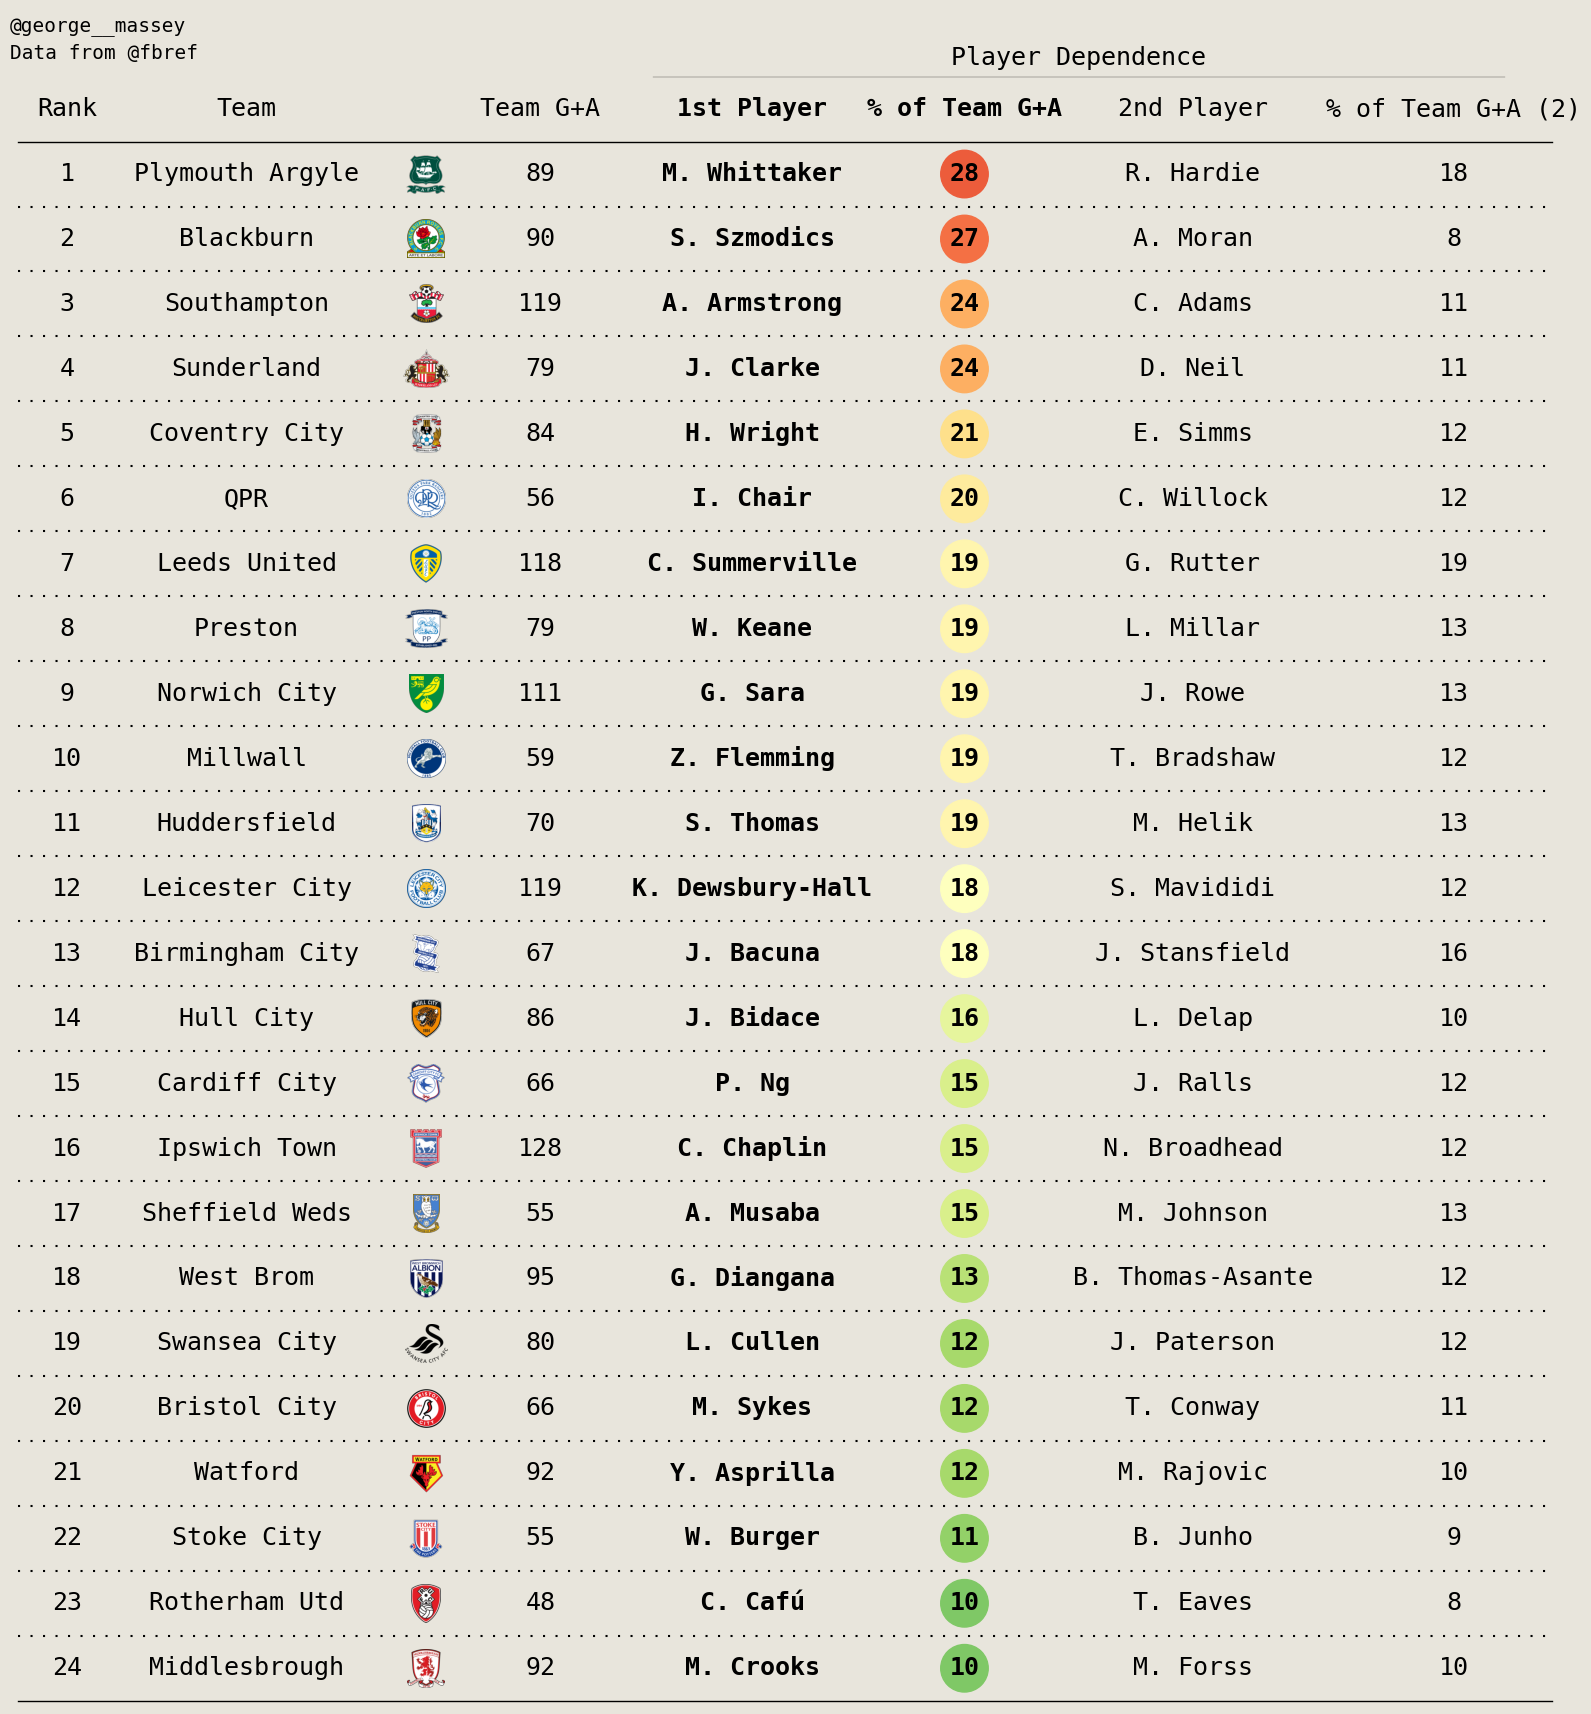

In [732]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_colour)
ax.set_facecolor(bg_colour)
ax.text(0, 0.995, "@george__massey", fontsize=14, transform=ax.transAxes, ha='left', va='top')
ax.text(0, 0.98, "Data from @fbref", fontsize=14, transform=ax.transAxes, ha='left', va='top')

table = Table(
    df,
    column_definitions=col_defs,
    index_col = 'Rank',
    row_dividers=True,
    row_divider_kw={"linewidth" : 1.5, "linestyle" : (0, (1,5))},
    footer_divider=True,
    textprops={"fontsize" : 18},
    ax=ax,
)#.autoset_fontcolors(colnames=["xG", "xGA", "xGD"])
# Set black text color for lighter colored circles

# Rest of the code...

#for idx in [0,1]:
 #   table.rows[idx].set_facecolor(row_colors["top2"])

#for idx in range(2,6):
 #   table.rows[idx].set_facecolor(row_colors["top6"])

#for idx in range(21,24):
 #   table.rows[idx].set_facecolor(row_colors["relegation"])

In [733]:
fig.savefig(
    "C:/Users/George/Documents/Football Analytics/Visuals/Player_Dependence.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight"
)